In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hàm tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Đọc dữ liệu từ file CSV
file_path = '/content/BTC-USD.csv'
data = pd.read_csv(file_path)

# Tiền xử lý dữ liệu
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Xác định các biến đầu vào và biến mục tiêu
X = data.drop(columns=['Close'])
y = data['Close']




**Chia tập dữ liệu 7:3**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỉ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình SVM với kernel linear
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)



SVR(kernel='linear')

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá hiệu suất mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 175437123.77773318
Root Mean Squared Error (RMSE): 13245.267976818483
Mean Absolute Error (MAE): 10985.050279640702
Mean Absolute Percentage Error (MAPE): 68.85%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


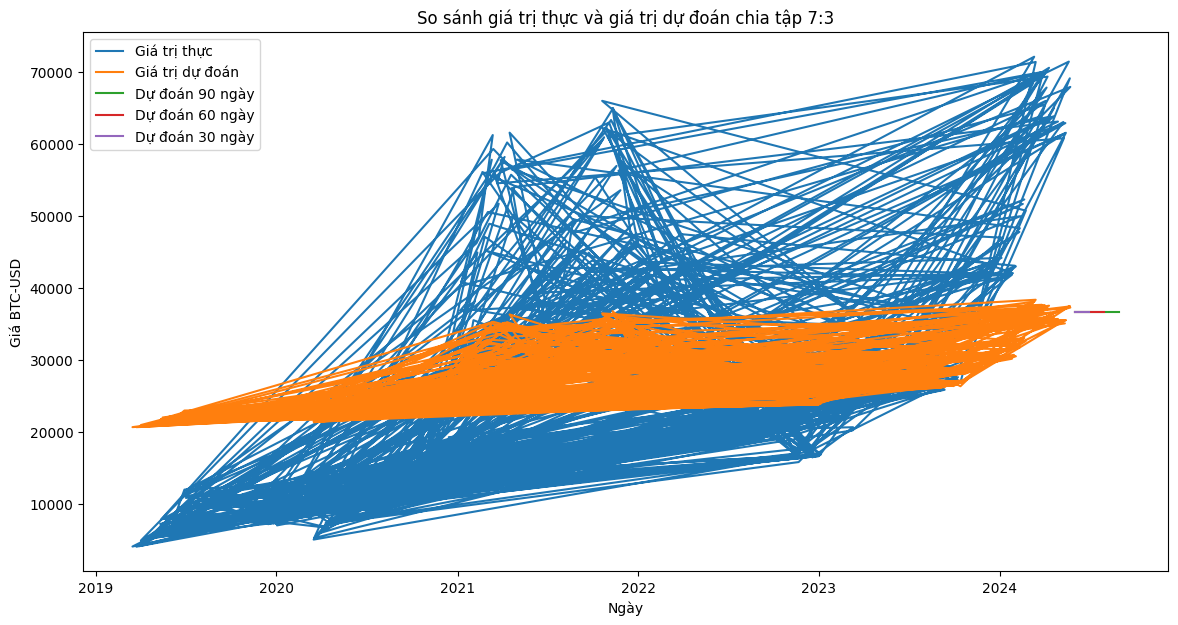

In [ ]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [90, 60, 30]

# Giả sử rằng các biến đầu vào cho các ngày tiếp theo được lấy từ các biến đầu vào của ngày cuối cùng trong tập dữ liệu
last_known_X = X.iloc[-1].values.reshape(1, -1)
last_known_X_scaled = scaler.transform(last_known_X)

future_predictions = {}
for days in future_days:
    future_X_scaled = np.tile(last_known_X_scaled, (days, 1))
    future_predictions[days] = svm_model.predict(future_X_scaled)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán trên tập kiểm tra
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Giá trị thực')
plt.plot(y_test.index, y_pred, label='Giá trị dự đoán')

# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo
last_date = y.index[-1]
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('So sánh giá trị thực và giá trị dự đoán chia tập 7:3')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()

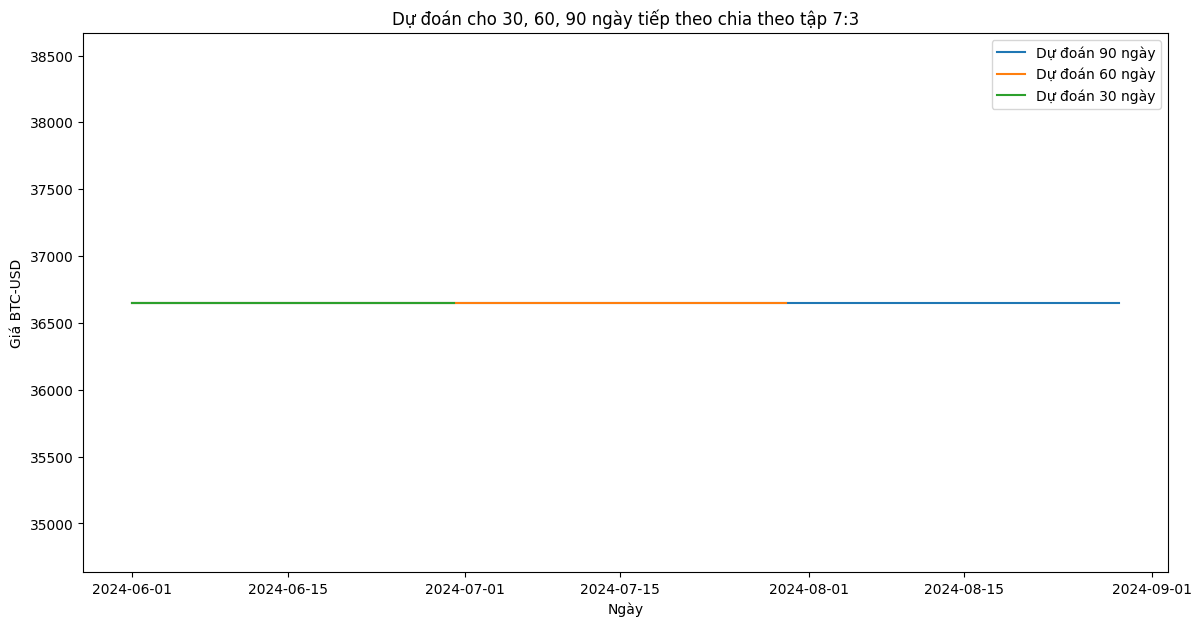

In [ ]:
# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo trong một biểu đồ riêng
plt.figure(figsize=(14, 7))
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('Dự đoán cho 30, 60, 90 ngày tiếp theo chia theo tập 7:3')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()

Chia tập dữ liệu 8:2

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỉ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình SVM với kernel linear
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá hiệu suất mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 162791080.69031152
Root Mean Squared Error (RMSE): 12758.960799779563
Mean Absolute Error (MAE): 10648.5380404611
Mean Absolute Percentage Error (MAPE): 69.25%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


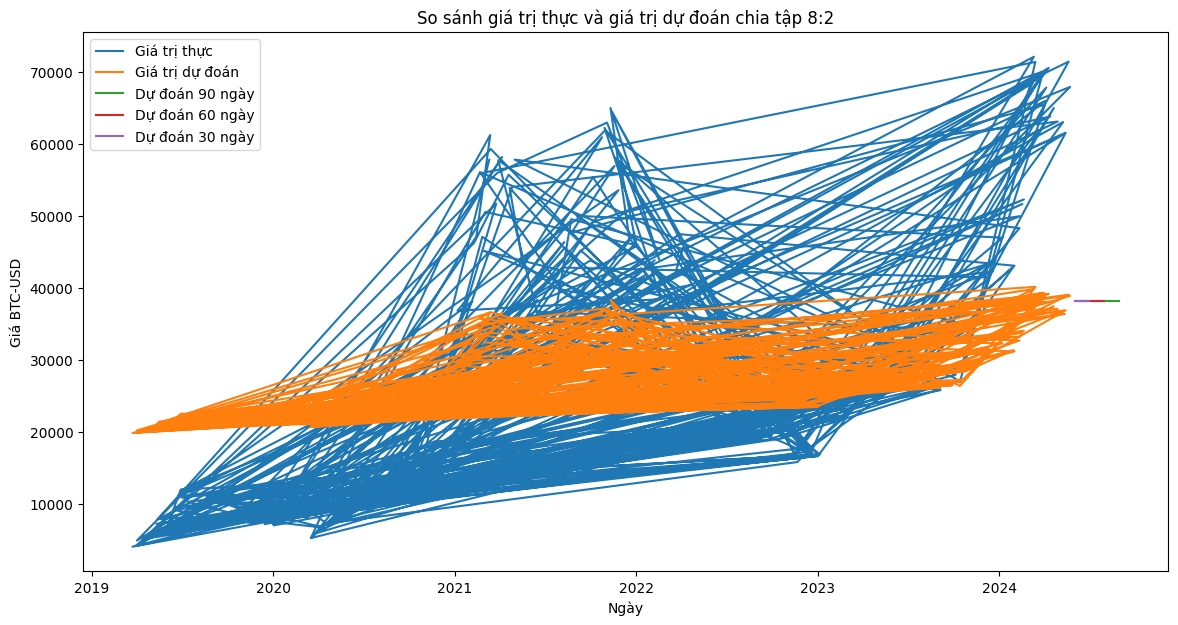

In [ ]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [90, 60, 30]

# Giả sử rằng các biến đầu vào cho các ngày tiếp theo được lấy từ các biến đầu vào của ngày cuối cùng trong tập dữ liệu
last_known_X = X.iloc[-1].values.reshape(1, -1)
last_known_X_scaled = scaler.transform(last_known_X)

future_predictions = {}
for days in future_days:
    future_X_scaled = np.tile(last_known_X_scaled, (days, 1))
    future_predictions[days] = svm_model.predict(future_X_scaled)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán trên tập kiểm tra
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Giá trị thực')
plt.plot(y_test.index, y_pred, label='Giá trị dự đoán')

# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo
last_date = y.index[-1]
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('So sánh giá trị thực và giá trị dự đoán chia tập 8:2')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()

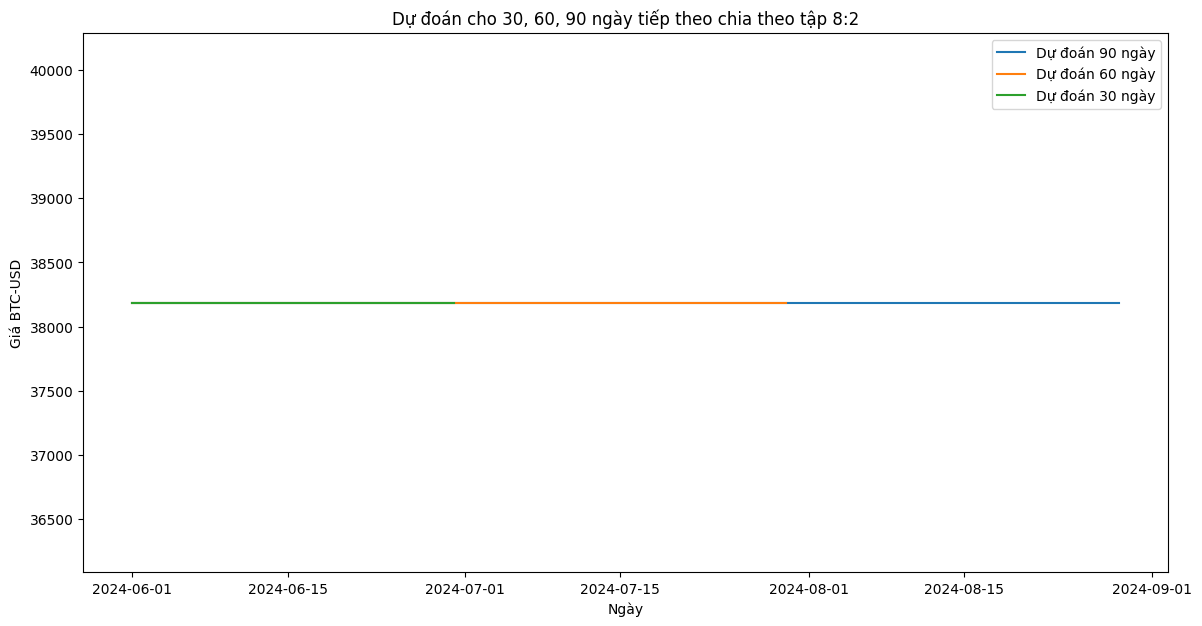

In [ ]:
# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo trong một biểu đồ riêng
plt.figure(figsize=(14, 7))
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('Dự đoán cho 30, 60, 90 ngày tiếp theo chia theo tập 8:2')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()

**Chia tập dữ liệu 6:4**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỉ lệ 6:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình SVM với kernel linear
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá hiệu suất mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 194589364.38761076
Root Mean Squared Error (RMSE): 13949.529181574939
Mean Absolute Error (MAE): 11599.248451605614
Mean Absolute Percentage Error (MAPE): 73.22%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


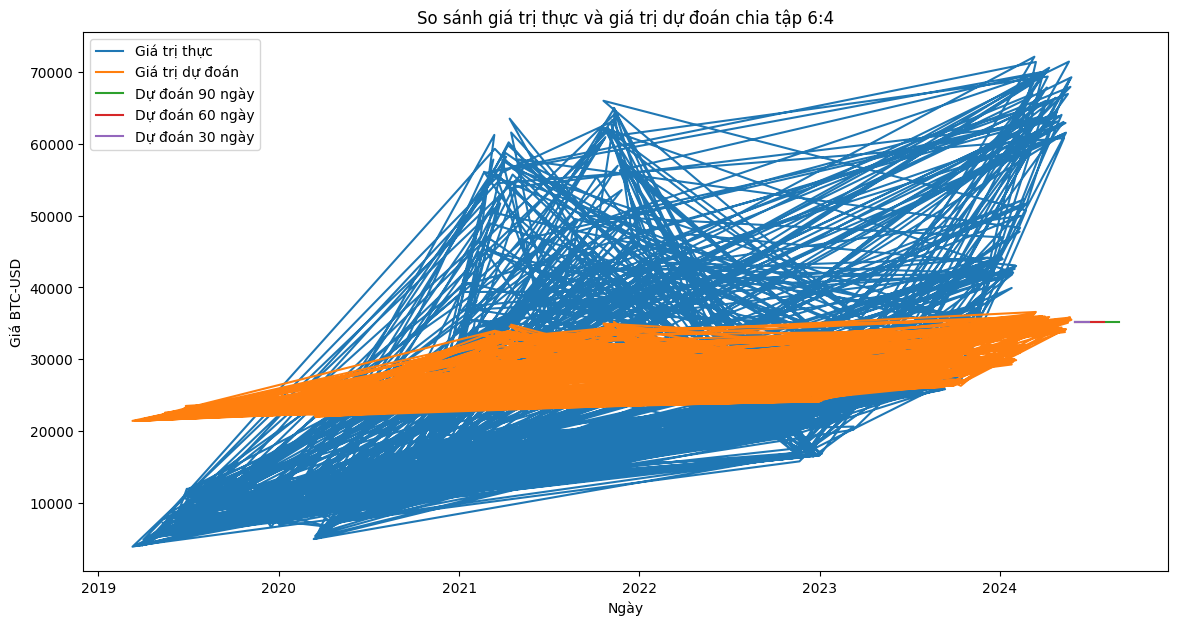

In [ ]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [90, 60, 30]

# Giả sử rằng các biến đầu vào cho các ngày tiếp theo được lấy từ các biến đầu vào của ngày cuối cùng trong tập dữ liệu
last_known_X = X.iloc[-1].values.reshape(1, -1)
last_known_X_scaled = scaler.transform(last_known_X)

future_predictions = {}
for days in future_days:
    future_X_scaled = np.tile(last_known_X_scaled, (days, 1))
    future_predictions[days] = svm_model.predict(future_X_scaled)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán trên tập kiểm tra
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Giá trị thực')
plt.plot(y_test.index, y_pred, label='Giá trị dự đoán')

# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo
last_date = y.index[-1]
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('So sánh giá trị thực và giá trị dự đoán chia tập 6:4')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()

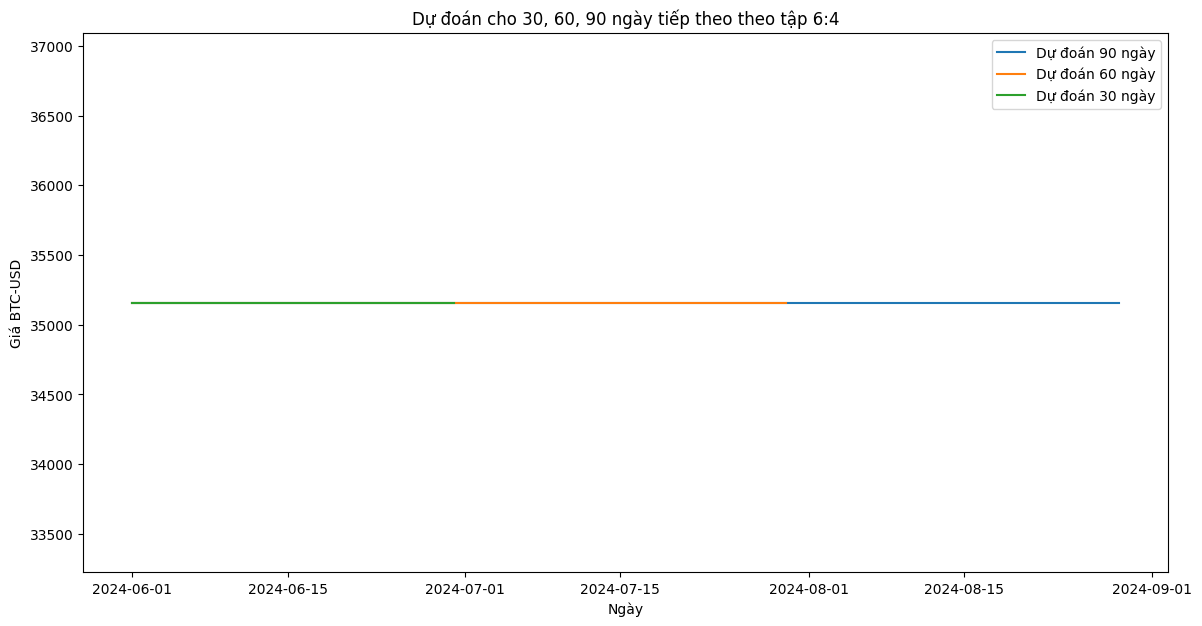

In [ ]:
# Vẽ biểu đồ dự đoán cho 30, 60, 90 ngày tiếp theo trong một biểu đồ riêng
plt.figure(figsize=(14, 7))
for days in future_days:
    future_dates = pd.date_range(start=last_date, periods=days, freq='D')
    future_values = future_predictions[days]
    plt.plot(future_dates, future_values, label=f'Dự đoán {days} ngày')

plt.legend()
plt.title('Dự đoán cho 30, 60, 90 ngày tiếp theo theo tập 6:4')
plt.xlabel('Ngày')
plt.ylabel('Giá BTC-USD')
plt.show()